# Imports

In [144]:
import sys
from math import ceil
import pandas as pd
# to save results to data directory
module_path = '..'
if module_path not in sys.path:
    sys.path.insert(1, module_path)
# increase displayed columns in jupyter notebook
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)

In [145]:
import logging
import numpy as np
import matplotlib.pyplot as plt
from src.outlier_model import OutlierModel

import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# increase displayed columns in jupyter notebook
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)

# temporarily remove deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

logging.basicConfig(format='%(asctime)s: %(message)s', datefmt='%m/%d/%Y %I:%M:%S %p')
logger = logging.getLogger("TimeSeries")
logger.setLevel(logging.INFO)

output_dir = 'beth_output'

# Dataset

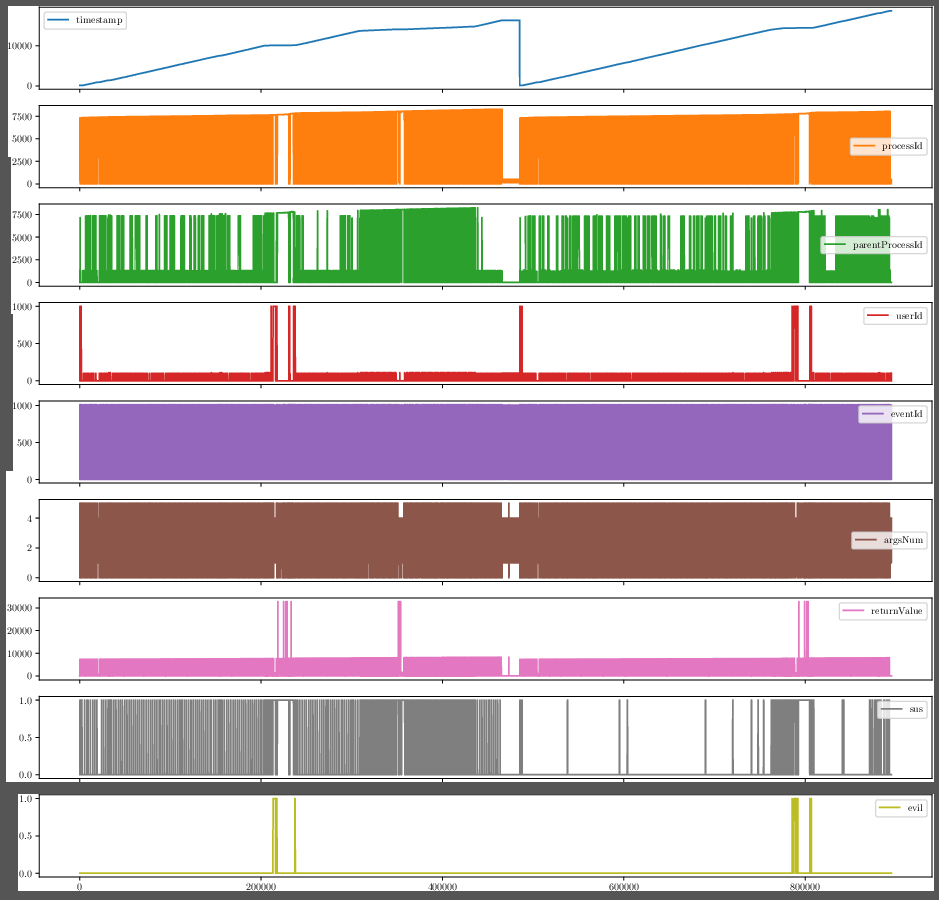

In [146]:
base_path = '#datasets'
df1 = pd.read_csv(f'{base_path}/BETH/labelled_2021may-ip-10-100-1-4.csv',index_col=False)
# df = pd.read_csv(f'{base_path}/BETH/labelled_2021may-ip-10-100-1-26.csv',index_col=False) # No evil
# df = pd.read_csv(f'{base_path}/BETH/labelled_2021may-ip-10-100-1-95.csv',index_col=False) # No evil
df2 = pd.read_csv(f'{base_path}/BETH/labelled_2021may-ip-10-100-1-105.csv',index_col=False) # Some evil
# df = pd.read_csv(f'{base_path}/BETH/labelled_2021may-ip-10-100-1-186.csv',index_col=False) # No evil
# df = pd.read_csv(f'{base_path}/BETH/labelled_2021may-ubuntu.csv',index_col=False) # No evil
frames = [df1, df2]
df = pd.concat(frames, ignore_index=True)
df.plot(subplots=True, figsize=(16, 16)); plt.legend(loc='best')

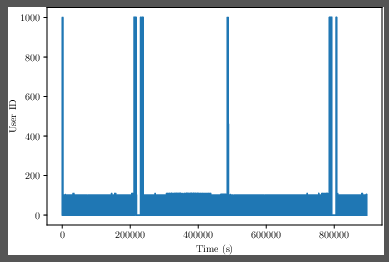

In [147]:
df.head()
height = 4
width = 6
outlier_key = "userId"
data_f_c = df[outlier_key]
fig = plt.figure()

plt.plot(data_f_c)
plt.xlabel('Time (s)')
plt.ylabel('User ID')

fig.set_size_inches(w=width, h=height)
plt.savefig(f'{output_dir}/base_sig_{outlier_key}_all.pgf')

In [148]:

data_test = df.copy()

m = 1000
preload_size = 10000
std_dev_mult = 3
range_mult = 2
recent_mult = 2
outlier_model = OutlierModel(m=m, std_dev_mult=std_dev_mult, range_mult=range_mult, recent_mult=recent_mult,
                             time_series=data_test[:preload_size][outlier_key].astype(np.float64),
                             egress=True)

In [149]:
fault = False
for index, row in data_test[preload_size:].iterrows():
    outlier_model.train_one(row[outlier_key])
    fault = outlier_model.predict_one(index)
    if index % 10000 == 0:
        print(f"Current Global index: {index}")

Current Global index: 10000


02/08/2022 10:27:48 PM:  Anomaly at Global index: 11000
02/08/2022 10:27:48 PM: max_mp: 13172.8523, metric:7156.672199999999: metric-max_mp: 6016.180100000001 range: 4241.051600000001


Current Global index: 20000
Current Global index: 30000
Current Global index: 40000
Current Global index: 50000
Current Global index: 60000
Current Global index: 70000
Current Global index: 80000
Current Global index: 90000
Current Global index: 100000
Current Global index: 110000
Current Global index: 120000
Current Global index: 130000
Current Global index: 140000
Current Global index: 150000
Current Global index: 160000
Current Global index: 170000
Current Global index: 180000
Current Global index: 190000
Current Global index: 200000
Current Global index: 210000


02/08/2022 10:29:08 PM:  Anomaly at Global index: 213090
02/08/2022 10:29:08 PM: max_mp: 2716.2331, metric:1071.7787: metric-max_mp: 1644.4543999999999 range: 1708.8236


Current Global index: 220000
Current Global index: 230000


02/08/2022 10:29:17 PM:  Anomaly at Global index: 237204
02/08/2022 10:29:17 PM: max_mp: 4256.8639, metric:2466.7595: metric-max_mp: 1790.1044000000002 range: 2442.4585


Current Global index: 240000
Current Global index: 250000
Current Global index: 260000
Current Global index: 270000
Current Global index: 280000
Current Global index: 290000
Current Global index: 300000
Current Global index: 310000
Current Global index: 320000
Current Global index: 330000
Current Global index: 340000
Current Global index: 350000
Current Global index: 360000
Current Global index: 370000
Current Global index: 380000
Current Global index: 390000
Current Global index: 400000
Current Global index: 410000
Current Global index: 420000
Current Global index: 430000
Current Global index: 440000
Current Global index: 450000
Current Global index: 460000
Current Global index: 470000
Current Global index: 480000


02/08/2022 10:31:03 PM:  Anomaly at Global index: 485354
02/08/2022 10:31:03 PM: max_mp: 5386.6102, metric:2327.0199: metric-max_mp: 3059.5903000000003 range: 3386.1303


Current Global index: 490000
Current Global index: 500000
Current Global index: 510000
Current Global index: 520000
Current Global index: 530000
Current Global index: 540000
Current Global index: 550000
Current Global index: 560000
Current Global index: 570000
Current Global index: 580000
Current Global index: 590000
Current Global index: 600000
Current Global index: 610000
Current Global index: 620000
Current Global index: 630000
Current Global index: 640000
Current Global index: 650000
Current Global index: 660000
Current Global index: 670000
Current Global index: 680000
Current Global index: 690000
Current Global index: 700000
Current Global index: 710000
Current Global index: 720000
Current Global index: 730000
Current Global index: 740000
Current Global index: 750000
Current Global index: 760000
Current Global index: 770000
Current Global index: 780000


02/08/2022 10:33:07 PM:  Anomaly at Global index: 787618
02/08/2022 10:33:07 PM: max_mp: 6206.1965, metric:2062.7696: metric-max_mp: 4143.4269 range: 4714.8508


Current Global index: 790000
Current Global index: 800000
Current Global index: 810000


02/08/2022 10:33:18 PM:  Anomaly at Global index: 816542
02/08/2022 10:33:18 PM: max_mp: 9845.8241, metric:3266.2714: metric-max_mp: 6579.5527 range: 6627.806699999999


Current Global index: 820000
Current Global index: 830000
Current Global index: 840000
Current Global index: 850000
Current Global index: 860000
Current Global index: 870000
Current Global index: 880000
Current Global index: 890000


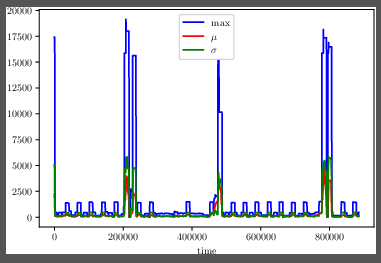

In [150]:
height = 4
width = 6
# In progress Plot
fig = plt.figure()
plt.plot(outlier_model.max_val,'b-', label='max')
plt.plot( outlier_model.max_mean,'r-',label=r'$\mu$')
plt.plot( outlier_model.max_std_dev,'g-',label=r'$\sigma$')
plt.xlabel('time')
plt.legend(loc=0)

fig.set_size_inches(w=width, h=height)
plt.savefig(f'{output_dir}/mp_hist_{outlier_key}.pgf')

02/08/2022 10:34:01 PM: [11000, 213090, 237204, 485354, 787618, 816542]


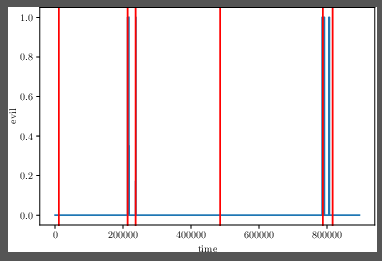

In [151]:
# Results plot
fig = plt.figure()
plt.plot(data_test["evil"] )
# plt.title(f"Detection Method: Anomaly")
logger.info(outlier_model.anomalies)
for i in outlier_model.anomalies:
    plt.axvline(x=i,color='r')
plt.xlabel(r'time')
plt.ylabel(r'evil')

fig.set_size_inches(w=width, h=height)
plt.savefig(f'{output_dir}/outlier_result_evil_{outlier_key}.pgf')

02/08/2022 10:34:03 PM: [11000, 213090, 237204, 485354, 787618, 816542]


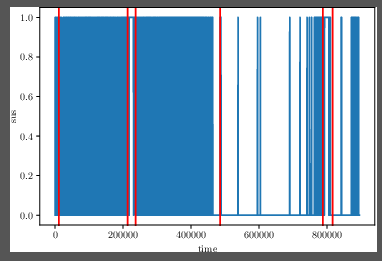

In [152]:
# Results plot
fig = plt.figure()
plt.plot(data_test["sus"] )
# plt.title(f"Detection Method: Anomaly")
logger.info(outlier_model.anomalies)
for i in outlier_model.anomalies:
    plt.axvline(x=i,color='r')
plt.xlabel(r'time')
plt.ylabel(r'sus')

fig.set_size_inches(w=width, h=height)
plt.savefig(f'{output_dir}/outlier_result_sus_{outlier_key}.pgf')